In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers, models
from keras.layers import Rescaling
from keras.utils import to_categorical
from keras.datasets import cifar10
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

class_names = ['airplane', "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [3]:
y_train.shape

(50000, 1)

In [4]:
# y_train shape is (50000, 1) meaning each label is in an array of its own
# flatten the y arrays to be easier to work with
y_train = y_train.flatten()
y_test = y_test.flatten()

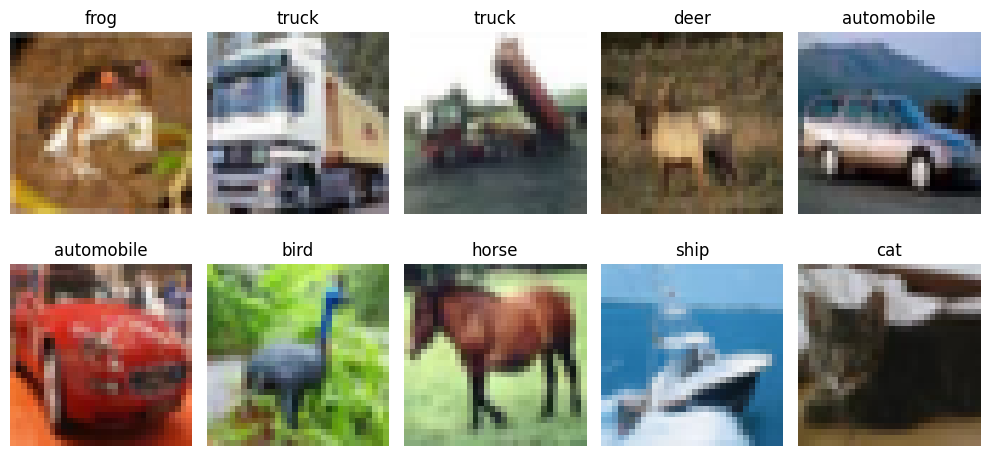

In [5]:
# visualise data points

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train[i]])   
    plt.axis('off')
plt.tight_layout()
plt.show()

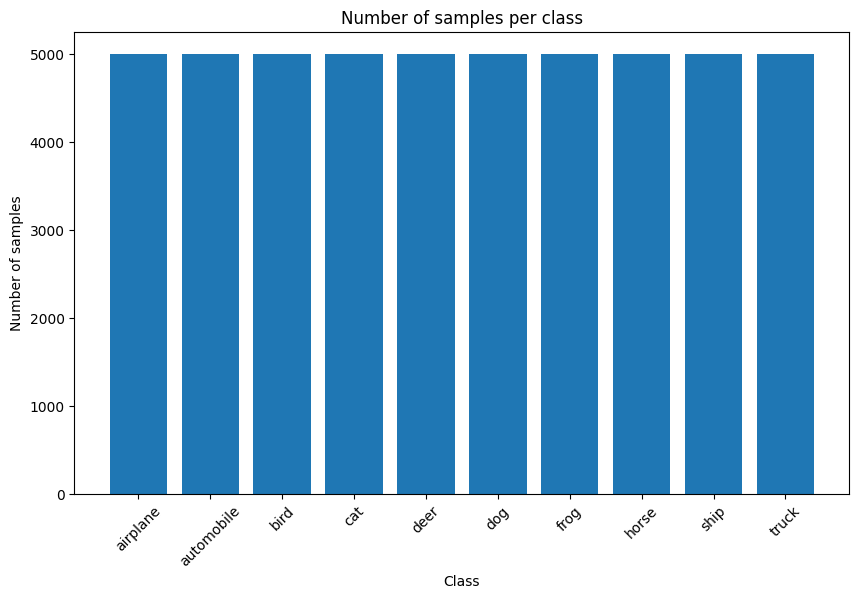

airplane: 5000
automobile: 5000
bird: 5000
cat: 5000
deer: 5000
dog: 5000
frog: 5000
horse: 5000
ship: 5000
truck: 5000


In [6]:
from collections import Counter

labels = y_train

# Count the number of samples per class
class_counts = Counter(labels)

# Sort by class index
classes = sorted(class_counts.keys())
counts = [class_counts[c] for c in classes]


# Plotting
plt.figure(figsize=(10, 6))
plt.bar(class_names, counts)
plt.xlabel('Class')
plt.ylabel('Number of samples')
plt.title('Number of samples per class')
plt.xticks(rotation=45)
plt.show()

# Optional: print counts for reference
for cls, count in zip(class_names, counts):
    print(f"{cls}: {count}")


In [7]:
# encode labels as one-hot vectors
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

In [8]:
X_train[0].shape

(32, 32, 3)

In [9]:
# normalise data to use values between 0 and §
normalization_layer = Rescaling(1./255)
X_train = normalization_layer(X_train)
X_test = normalization_layer(X_test)

X_train[0]

<tf.Tensor: shape=(32, 32, 3), dtype=float32, numpy=
array([[[0.23137257, 0.24313727, 0.24705884],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607845, 0.18823531, 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352945],
        [0.59607846, 0.4901961 , 0.40000004],
        [0.5803922 , 0.48627454, 0.4039216 ]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235297, 0.34509805, 0.21568629],
        [0.4666667 , 0.3254902 , 0.19607845],
        [0.4784314 , 0.34117648, 0.22352943]],

       [[0.09803922, 0.09411766, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215688, 0.10588236, 0.03137255],
        ...,
        [0.46274513, 0.32941177, 0.19607845],
        [0.47058827, 0.32941177, 0.19607845],
        [0.427451  , 0.28627452, 0.16470589]],

       ...,

       [[0.81568635, 0.6666667 , 0.37647063],
        [0.7882

In [10]:
X_train[0].shape

TensorShape([32, 32, 3])

In [65]:
256*2

512

# Creating a CNN from scratch

In [110]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, Activation, BatchNormalization, GlobalAveragePooling2D
from keras.activations import gelu

In [102]:
# create model
model = Sequential()

# define the input shape
model.add(Input(shape=(32,32,3)))

# first convolution layer - number of filters as close to the image size = 32
model.add(Conv2D(32, (3,3), activation=gelu, padding="same"))

model.add(Conv2D(32, (3,3), activation=gelu, padding="same"))

model.add(Conv2D(32, (3,3), activation=gelu, padding="same"))

# pooling layer to reduce spatial dimensions
model.add(MaxPooling2D(2,2))

# dropout layer
model.add(Dropout(0.25))

# second convolutional layer
model.add(Conv2D(64, (3,3), activation=gelu, padding="same"))

model.add(Conv2D(64, (3,3), activation=gelu, padding="same"))

model.add(Conv2D(64, (3,3), activation=gelu, padding="same"))

# pooling layer
model.add(MaxPooling2D(2,2))

# dropout layer
# model.add(Dropout(0.25))

# # third convolutional layer
# model.add(Conv2D(512, (3,3), activation=gelu))

# # pooling layer
# model.add(MaxPooling2D(2,2))

# flatten for dense layers
model.add(Flatten())

# fully connected layer
model.add(Dense(128, activation=gelu))

# dropout layer
model.add(Dropout(0.5))

# output layer
# multiclass classification with softmax activation
# 10 neurons since there are 10 distinct labels
model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_55 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_56 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_57 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_45 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_58 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_59 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_60 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_46 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 637,450 (2.43 MB)

 Trainable params: 637,450 (2.43 MB)

 Non-trainable params: 0 (0.00 B)

In [103]:
# compile the model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [104]:
epochs = 50
batch_size = 32

In [105]:
from keras.callbacks import EarlyStopping

# early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

In [106]:
# fit the model using data from the training set for validation
history = model.fit(
    X_train, 
    y_train_cat, 
    batch_size=batch_size, 
    epochs=epochs, 
    validation_split=0.2,
    callbacks=[early_stopping]
    )

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 64ms/step - accuracy: 0.4547 - loss: 1.5190 - val_accuracy: 0.6029 - val_loss: 1.1051
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 96s 77ms/step - accuracy: 0.6166 - loss: 1.0956 - val_accuracy: 0.6570 - val_loss: 0.9852
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 95s 76ms/step - accuracy: 0.6688 - loss: 0.9485 - val_accuracy: 0.7100 - val_loss: 0.8352
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 101s 80ms/step - accuracy: 0.7011 - loss: 0.8494 - val_accuracy: 0.7212 - val_loss: 0.8015
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 98s 79ms/step - accuracy: 0.7278 - loss: 0.7776 - val_accuracy: 0.7242 - val_loss: 0.7961
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 95s 76ms/step - accuracy: 0.7488 - loss: 0.7054 - val_accuracy: 0.7454 - val_loss: 0.7452
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 95s 76ms/step - accuracy: 0.7707 - loss: 0.6498 - val_accuracy: 0.7513 - val_loss: 0.7238
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 95s 76ms/step - accuracy: 0.7879 

In [107]:
# evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_cat)
print(f"Test accuracy: {accuracy:.4f}")
print(f"Test loss: {loss:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.7577 - loss: 0.7412
Test accuracy: 0.7577
Test loss: 0.7412


Test accuracy: 0.7577
Test loss: 0.7412

In [127]:
model.save("CNN_Model_Laura.keras")

# Attempting a different strategy for CNN from scratch

For the second model, I added a batch normalisation layer between the Conv2D layer and its activation. The normalisation smooths out the learning curves.

I also replaced the Flatten layer with a GlobalAveragePooling2D layer to reduce the number of params going into the final Dense classification layers. This tends to improve generalisation and prevent overfitting, while also reducing parametres going into the dense layers. Instead of passing the full spatial map to the dense layers, GAP provides the final layers more information about the features that the convolutional layers extracted.

In [119]:
# create new model with BatchNormalization
model2 = Sequential()

# define the input shape
model2.add(Input(shape=(32,32,3)))

# first convolution block
model2.add(Conv2D(32, (3,3), padding="same"))
model2.add(BatchNormalization())                # normalise the batch before activation
model2.add(Activation(gelu))

model2.add(Conv2D(32, (3,3), padding="same"))
model2.add(BatchNormalization())
model2.add(Activation(gelu))

model2.add(MaxPooling2D((2,2)))

model2.add(Dropout(0.2))

# second convolution block
model2.add(Conv2D(64, (3,3), padding="same"))
model2.add(BatchNormalization())                # normalise the batch before activation
model2.add(Activation(gelu))

model2.add(Conv2D(64, (3,3), padding="same"))
model2.add(BatchNormalization())
model2.add(Activation(gelu))

model2.add(MaxPooling2D((2,2)))

model2.add(Dropout(0.3))

# third convolution block
model2.add(Conv2D(128, (3,3), padding="same"))
model2.add(BatchNormalization())                # normalise the batch before activation
model2.add(Activation(gelu))

model2.add(Conv2D(128, (3,3), padding="same"))
model2.add(BatchNormalization())
model2.add(Activation(gelu))

model2.add(MaxPooling2D((2,2)))

model2.add(Dropout(0.3))

# classification block
model2.add(GlobalAveragePooling2D())

model2.add(Dense(128, activation=gelu))

model2.add(Dropout(0.4))

# output layer
# multiclass classification with softmax activation
# 10 neurons since there are 10 distinct labels
model2.add(Dense(10, activation="softmax"))

model2.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_69 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_70 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_51 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_71 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_72 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_52 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_73 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_74 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_13 (Activation)      │ (None, 8, 8, 128)      │             

 Total params: 306,602 (1.17 MB)

 Trainable params: 305,706 (1.17 MB)

 Non-trainable params: 896 (3.50 KB)

In [120]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [121]:
early_stopping2 = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

In [122]:
# fit the model using data from the training set for validation
history2 = model2.fit(
    X_train, 
    y_train_cat, 
    batch_size=batch_size, 
    epochs=epochs, 
    validation_split=0.2,
    callbacks=[early_stopping2]
    )

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 83s 65ms/step - accuracy: 0.4719 - loss: 1.4540 - val_accuracy: 0.5481 - val_loss: 1.2061
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 110s 88ms/step - accuracy: 0.6176 - loss: 1.0723 - val_accuracy: 0.6127 - val_loss: 1.1264
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 101s 81ms/step - accuracy: 0.6822 - loss: 0.9132 - val_accuracy: 0.6409 - val_loss: 1.0733
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 100s 80ms/step - accuracy: 0.7177 - loss: 0.8154 - val_accuracy: 0.7177 - val_loss: 0.8004
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 96s 77ms/step - accuracy: 0.7445 - loss: 0.7423 - val_accuracy: 0.7878 - val_loss: 0.6142
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 99s 79ms/step - accuracy: 0.7666 - loss: 0.6787 - val_accuracy: 0.7249 - val_loss: 0.8138
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 101s 81ms/step - accuracy: 0.7829 - loss: 0.6279 - val_accuracy: 0.7988 - val_loss: 0.5904
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 99s 80ms/step - accuracy: 0.79

In [123]:
# evaluate the model
loss, accuracy = model2.evaluate(X_test, y_test_cat)
print(f"Test accuracy: {accuracy:.4f}")
print(f"Test loss: {loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.8195 - loss: 0.5296
Test accuracy: 0.8195
Test loss: 0.5296


In [128]:
model2.save("CNN_BatchNorm_Laura.keras")

In [124]:
y_pred_probs = model2.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


In [125]:
report = classification_report(y_test, y_pred, target_names=class_names)
print(report)

              precision    recall  f1-score   support

    airplane       0.75      0.90      0.82      1000
  automobile       0.95      0.89      0.92      1000
        bird       0.88      0.62      0.72      1000
         cat       0.69      0.66      0.67      1000
        deer       0.87      0.74      0.80      1000
         dog       0.71      0.77      0.73      1000
        frog       0.85      0.87      0.86      1000
       horse       0.76      0.94      0.84      1000
        ship       0.93      0.89      0.91      1000
       truck       0.87      0.92      0.90      1000

    accuracy                           0.82     10000
   macro avg       0.83      0.82      0.82     10000
weighted avg       0.83      0.82      0.82     10000



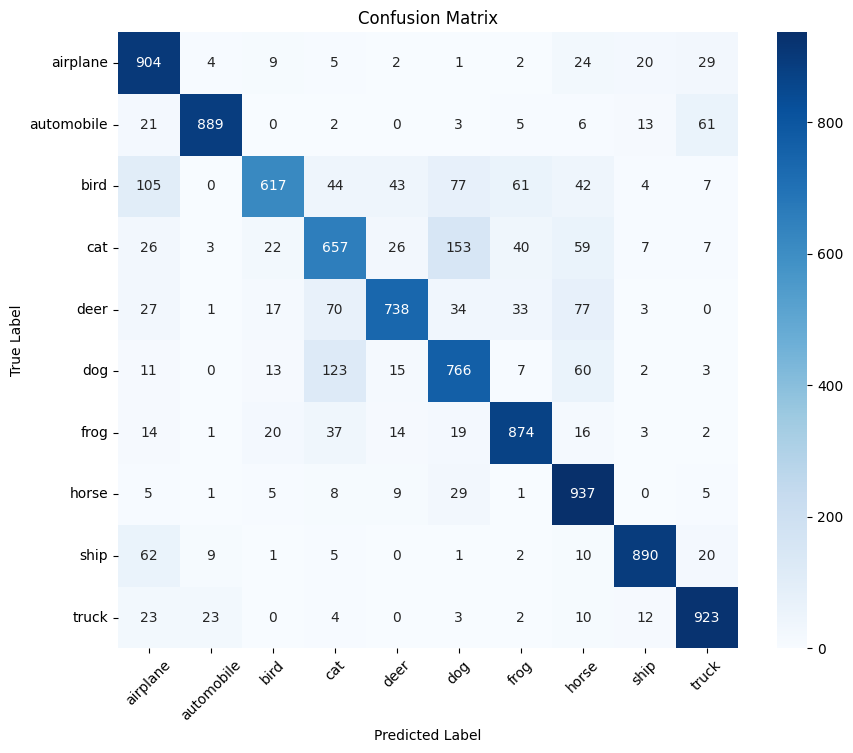

In [126]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()